In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('outlier_removed.csv')

In [3]:

df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                    0
agePossession             0
super_built_up_area    1687
built_up_area          1969
carpet_area            1716
others                    0
store room                0
pooja room                0
servant room              0
study room                0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

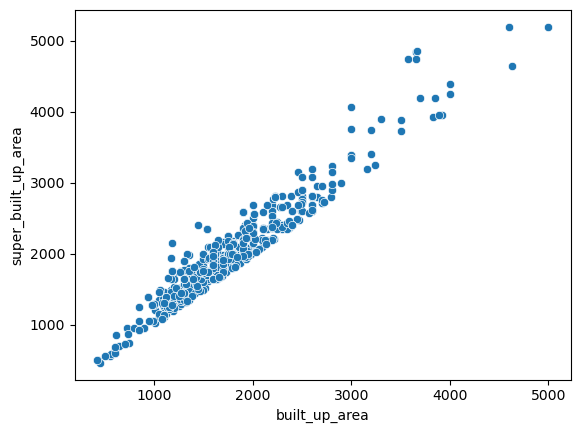

In [4]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

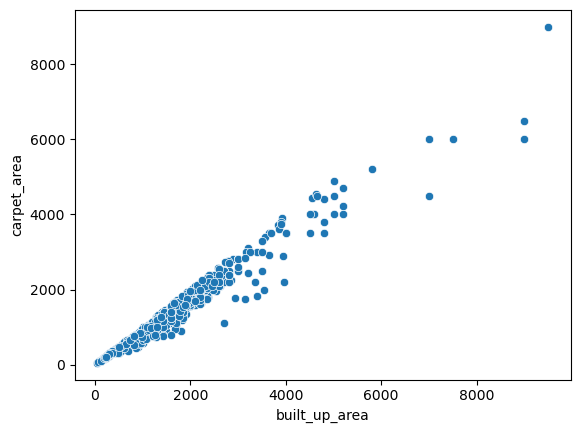

In [5]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])

In [6]:
not_null_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [7]:
not_null_df.shape

(531, 23)

# We are finding the super built to built ratio and carpet to built ratio to fill the null values with in each of these fields with help of the one whose values for the corresponding row is present

In [8]:
sb_ratio = (not_null_df['super_built_up_area']/not_null_df['built_up_area']).median()

In [9]:
cb_ratio = (not_null_df['carpet_area']/not_null_df['built_up_area']).median()

In [10]:
sb_ratio, cb_ratio

(1.105263157894737, 0.9)

When both super built up and carpet area present but built up null, do (super built/sb_ratio + carpet/cb_ratio)/2

In [11]:
sc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sc_df['built_up_area'].fillna(round(((sc_df['super_built_up_area']/sb_ratio) + (sc_df['carpet_area']/cb_ratio))/2),inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_9540\2610102971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sc_df['built_up_area'].fillna(round(((sc_df['super_built_up_area']/sb_ratio) + (sc_df['carpet_area']/cb_ratio))/2),inplace=True)
C:\Users\anush\AppData\Local\Temp\ipykernel_9540\2610102971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [12]:
df.update(sc_df)

In [13]:
df['built_up_area'].isnull().sum()

np.int64(1548)

When super built present carpet area is null and built up is null, use only sb_ratio

In [14]:
s_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
s_df['built_up_area'].fillna(round(s_df['super_built_up_area']/sb_ratio),inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_9540\2865855867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  s_df['built_up_area'].fillna(round(s_df['super_built_up_area']/sb_ratio),inplace=True)
C:\Users\anush\AppData\Local\Temp\ipykernel_9540\2865855867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df['built_up_area'].fillna(round

In [15]:
df.update(s_df)

In [16]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                    0
agePossession             0
super_built_up_area    1687
built_up_area           673
carpet_area            1716
others                    0
store room                0
pooja room                0
servant room              0
study room                0
furnishing_type           0
luxury_score              0
dtype: int64

super built null carpet is present built up null, use cb_ratio only

In [17]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df['built_up_area'].fillna(round(c_df['carpet_area']/cb_ratio),inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_9540\3164484750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/cb_ratio),inplace=True)
C:\Users\anush\AppData\Local\Temp\ipykernel_9540\3164484750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['c

In [18]:
df.update(c_df)
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                    0
agePossession             0
super_built_up_area    1687
built_up_area             0
carpet_area            1716
others                    0
store room                0
pooja room                0
servant room              0
study room                0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

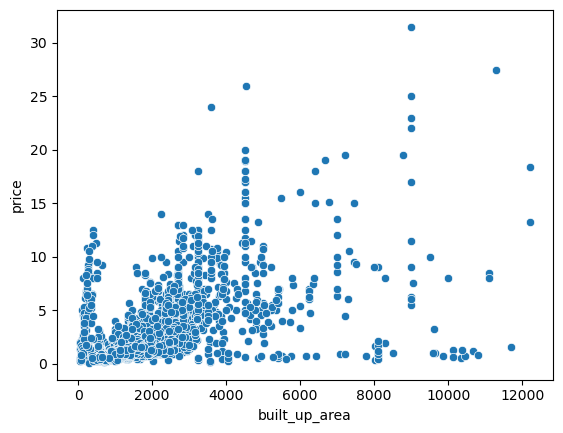

In [19]:
sns.scatterplot(x =df['built_up_area'],y=df['price'])

In [20]:
anomaly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [21]:
anomaly_df.shape

(258, 3)

<Axes: xlabel='built_up_area', ylabel='price'>

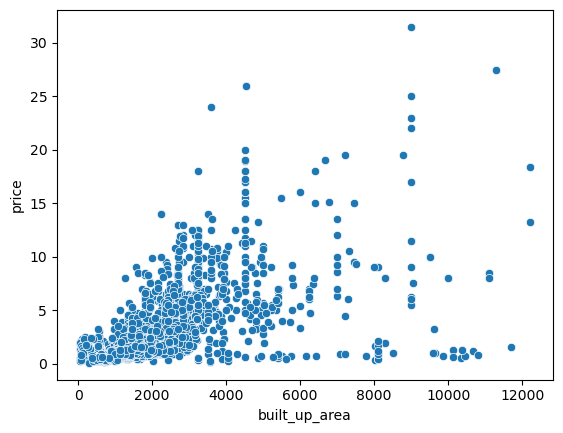

In [22]:
anomaly_df['built_up_area'] = anomaly_df['area']
df.update(anomaly_df)
sns.scatterplot(x =df['built_up_area'],y= df['price'])

In [23]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,others,store room,pooja room,servant room,study room,furnishing_type,luxury_score
0,flat,sobha smriti apartments,sector 56,0.50,8333.0,1,1,2,3.0,not available,Undefined,667.0,0,0,0,0,0,1,0
1,house,ansal sushant lok plots,sector 43,11.50,12778.0,7,8,3+,3.0,not available,Old Property,9000.0,0,1,1,1,0,0,31
2,flat,ss the leaf,sector 85,1.20,10084.0,2,2,2,4.0,East,Relatively New,1190.0,0,1,0,1,0,1,81
3,flat,dlf regency park,sector 28,2.35,13225.0,3,4,3,8.0,South-East,Old Property,1700.0,0,0,0,1,0,0,109
4,flat,dlf the primus,sector 82a,2.20,10516.0,3,3,3+,16.0,North-East,Relatively New,1893.0,0,0,0,1,0,2,174


In [25]:

df.isnull().sum()

property_type       0
society             0
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           19
facing              0
agePossession       0
built_up_area       0
others              0
store room          0
pooja room          0
servant room        0
study room          0
furnishing_type     0
luxury_score        0
dtype: int64

In [26]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,others,store room,pooja room,servant room,study room,furnishing_type,luxury_score
150,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0000,0,1,1,1,0,1,88
264,house,independent,sector 3,1.50,10323.0,3,3,0,NaN,not available,Old Property,210.0000,0,0,0,0,0,1,0
271,house,emaar mgf marbella,sector 66,9.00,16049.0,4,4,3+,NaN,South-West,Relatively New,5200.0000,0,1,1,1,0,0,114
813,house,independent,sector 24,1.45,26942.0,3,3,1,NaN,not available,Old Property,540.0000,0,0,0,0,0,0,9
970,house,ansal sushant lok,sector 43,10.50,27871.0,4,4,2,NaN,North-East,Old Property,3762.0000,0,0,0,1,0,1,59
1478,house,independent,sector 46,6.81,36998.0,12,14,3+,NaN,East,New Property,1840.6269,1,0,0,1,0,0,40
1555,flat,independent,sector 78,0.60,3692.0,2,2,0,NaN,not available,Under Construction,1625.0000,0,0,0,0,0,1,0
1724,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,not available,Relatively New,3240.0000,0,0,0,0,0,1,21
1851,house,independent,sector 4,0.65,11183.0,4,2,2,NaN,not available,Moderately Old,585.0000,0,0,0,0,0,1,0
2008,house,independent,sector 4,4.12,8881.0,2,1,3+,NaN,not available,Moderately Old,4635.0000,0,0,0,0,0,1,0


In [27]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [28]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_9540\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [29]:

df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
others             0
store room         0
pooja room         0
servant room       0
study room         0
furnishing_type    0
luxury_score       0
dtype: int64

In [30]:
df['facing'].value_counts()

facing
not available    1012
East              608
North-East        605
North             372
West              242
South             226
North-West        181
South-East        168
South-West        148
Name: count, dtype: int64

<Axes: ylabel='count'>

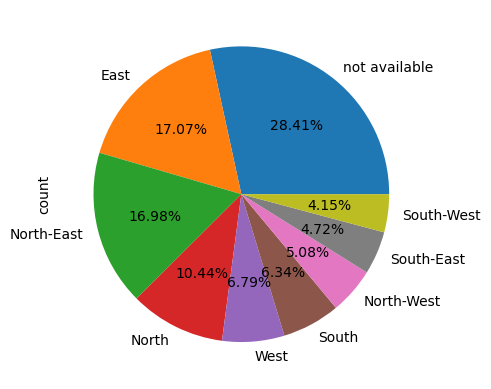

In [31]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [32]:
#though it's a big percentage, couldn't find out a way to logically impute this,
#could have used most frequent item by simpleimputer, but still dropping the column
1012/df.shape[0] 

0.2841100505334082

In [33]:
df.drop(columns=['facing'],inplace=True)

In [34]:
df['agePossession'].value_counts()

agePossession
Relatively New        1610
New Property           569
Moderately Old         542
Undefined              431
Old Property           286
Under Construction     124
Name: count, dtype: int64

In [35]:
#imputing mode value among all the entries which match with the sector and property_type of the 'Undefined' agepossession entries
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [36]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [37]:
df['agePossession'].value_counts()

agePossession
Relatively New        1789
New Property           645
Moderately Old         588
Old Property           317
Under Construction     126
Undefined               97
Name: count, dtype: int64

In [38]:
#imputing mode value among all the entries which match only with the sector not with the property_type of the 'Undefined' agepossession entries
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [39]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [40]:
df['agePossession'].value_counts()

agePossession
Relatively New        1814
New Property           666
Moderately Old         595
Old Property           333
Under Construction     126
Undefined               28
Name: count, dtype: int64

In [41]:
#when match is found only with the property_type not with sector
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [42]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [43]:
df['agePossession'].value_counts()

agePossession
Relatively New        1828
New Property           666
Moderately Old         609
Old Property           333
Under Construction     126
Name: count, dtype: int64

In [44]:
df.to_csv('missing_value_imputed.csv',index=False)